# **YZV211E Term Project**
## Examining the Relationship of General Education Levels and Regional Employment in Turkey

### Ministry of ML Engineers
Batuhan Sal (150210316)\
Ömer Erdağ (150210332)\
Serdar Biçici (150210331)

# **Problem Definition**

The challenge lies in uncovering patterns related to regional employment based on the 
education levels of specific regions. Additional parameters such as gender, years, and age 
distribution will be evaluated for further analysis and to determine employment trends in the 
regions.

# Libraries

In [2]:
# The necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# **DATA CLEANING AND PREPARATION**

Two datasets form the foundation of this project, both centered around regional statistics in Turkey. The first dataset comprises comprehensive employment data, including age intervals, 12 regions, three economic branches, gender distribution, and yearly organization. The second dataset focuses on regional education statistics, featuring distinct age intervals, 12 regions, nine education levels, gender distributions, and annual organization. These datasets will be utilized to explore and analyze the complex interplay between regional employment and education in Turkey.

In addition, manual data manipulation techniques were used for the project.

# **Education Data Manipulation**


In [3]:
# The data is read from the excel file
df_edu = pd.read_excel("education_data.xls")

# Some rows are filled with NaN values, so they are dropped
df_edu.iloc[:, 0] = df_edu.iloc[:, 0].ffill()
df_edu.fillna(0, inplace=True)

# The indexes are set
df_edu = df_edu.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi", "Yıl"])

# Datatypes are changed to int
df_edu = df_edu.astype(int)

# Visualizing the data
df_edu


Akdeniz-TR6  Batı Anadolu-TR5  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                   
Erkek ve 14-17 ve Bilinmeyen     2014          746               427   
                                 2015          723               461   
                                 2016          663               423   
                                 2017          778               371   
                                 2018          881               356   
...                                            ...               ...   
Kadın ve 65+ ve İlkokul          2018       165190            153831   
                                 2019       181626            168222   
                                 2020       202124            184294   
                                 2021       216331            195997   
                                 2022       227173            204605   

                                       Batı Karadeniz-TR8  Batı Marmara-TR2  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Erkek ve 14-17 ve Bilinmeyen     2014                 271               148   
                                 2015                 235               117   
                                 2016                 277               124   
                                 2017                 252                94   
                                 2018                 182                65   
...                                                   ...               ...   
Kadın ve 65+ ve İlkokul          2018              118354            136866   
                                 2019              128778            144980   
                                 2020              143362            155736   
                                 2021              153940            163238   
                                 2022              161369            170118   

                                       Doğu Karadeniz-TR9  Doğu Marmara-TR4  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Erkek ve 14-17 ve Bilinmeyen     2014                 208               519   
                                 2015                 330               507   
                                 2016                 612               493   
                                 2017                 698               408   
                                 2018                 208               396   
...                                                   ...               ...   
Kadın ve 65+ ve İlkokul          2018               53358            188390   
                                 2019               58333            202431   
                                 2020               66420            220433   
                                 2021               72412            233496   
                                 2022               76624            243385   

                                       Ege-TR3  Güneydoğu Anadolu-TRC  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                    
Erkek ve 14-17 ve Bilinmeyen     2014      716                   1048   
                                 2015      637                   1055   
                                 2016      672                   1086   
                                 2017      554                   1101   
                                 2018      429                    958   
...                                        ...                    ...   
Kadın ve 65+ ve İlkokul          2018   307593                  32315   
                                 2019   328772                  36092   
                                 2020   354619                  41158   
                                 2021   372115                  44895   
                                 2022   386447                  48498   

                                       Kuzeydoğu Anadolu-TRA  \
Cinsiyet ve Yaş ve Eğitim Düzeyi

In [4]:

# Education levels are grouped

less_than_basic = ["Bilinmeyen", "Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen", "Okuma Yazma Bilmeyen"]
basic = ["Ortaokul Veya Dengi Meslek Ortaokul", "İlkokul"]
intermediate = ["Lise Ve Dengi Meslek Okulu"]
advanced = ["Doktora", "Yüksek Lisans (5 Veya 6 Yıllık Fakülteler Dahil)", "Yüksekokul Veya Fakülte"]
all_ = ["Bilinmeyen", "Okuma Yazma Bilen Fakat Bir Okul Bitirmeyen", "Okuma Yazma Bilmeyen","Ortaokul Veya Dengi Meslek Ortaokul",
        "İlkokul","Lise Ve Dengi Meslek Okulu","Yüksekokul Veya Fakülte"]


In [5]:
# The string returned for the given parameters for data's index
def get_edu(gender,age,level):
    return f"{gender} ve {age} ve {level}"
# Genders list both in Turkish and English
genders_tr = ["Erkek", "Kadın"]
genders_en = ["Male", "Female"]

In [6]:
# The columns are renamed for each age groups for both genders
for g_tr,g_en in zip(genders_tr,genders_en):
    for i in all_:
        df_edu.rename({ get_edu(g_tr,"30-34",i):f"{i}_Young_{g_en}",
                       get_edu(g_tr,"35-39",i):f"{i}_Middle_{g_en}",
                       get_edu(g_tr,"55-59",i):f"{i}_Old_{g_en}"
    },inplace=True)


In [7]:
# The rows are added together for finding the total number of people for each age group in specific education level
for g_tr,g_en in zip(genders_tr,genders_en):
    for i in all_:

        # The young people are added together for finding the total number of people for each age group in specific education level
        Young_row = (df_edu.loc[f"{i}_Young_{g_en}"] + df_edu.loc[get_edu(g_tr,"18-21",i)] + df_edu.loc[get_edu(g_tr,"22-24",i)] +
        df_edu.loc[get_edu(g_tr,"25-29",i)] + df_edu.loc[get_edu(g_tr,"14-17",i)])

        # The middle aged people are added together for finding the total number of people for each age group in specific education level
        Middle_row = (df_edu.loc[f"{i}_Middle_{g_en}"] + df_edu.loc[get_edu(g_tr,"40-44",i)] +
                    df_edu.loc[get_edu(g_tr,"45-49",i)] + df_edu.loc[get_edu(g_tr,"50-54",i)])
        # The old people are added together for finding the total number of people for each age group in specific education level 
        Old_row = df_edu.loc[f"{i}_Old_{g_en}"] + df_edu.loc[get_edu(g_tr,"60-64",i)] + df_edu.loc[get_edu(g_tr,"65+",i)]

        # Insert the column name for convenience
        Young_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Young_{g_en}")
        Middle_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Middle_{g_en}")
        Old_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Old_{g_en}")


        # The indexes are resetted
        Young_row.reset_index(inplace=True)
        Middle_row.reset_index(inplace=True)
        Old_row.reset_index(inplace=True)

        # The indexes are setted again
        Young_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Middle_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Old_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)

        # The rows are dropped because they are not needed anymore
        df_edu = df_edu.drop([get_edu(g_tr,"18-21",i),get_edu(g_tr,"22-24",i),
                              get_edu(g_tr,"25-29",i),get_edu(g_tr,"14-17",i),
                              get_edu(g_tr,"40-44",i),get_edu(g_tr,"45-49",i),
                              get_edu(g_tr,"50-54",i),get_edu(g_tr,"60-64",i),
                              get_edu(g_tr,"65+",i)
                                    ])
        # The rows are added again
        df_edu.loc[f"{i}_Young_{g_en}"] = Young_row
        df_edu.loc[f"{i}_Middle_{g_en}"] = Middle_row
        df_edu.loc[f"{i}_Old_{g_en}"] = Old_row

C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3208102239.py:32: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"18-21",i),get_edu(g_tr,"22-24",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3208102239.py:32: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"18-21",i),get_edu(g_tr,"22-24",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3208102239.py:32: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"18-21",i),get_edu(g_tr,"22-24",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3208102239.py:32: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"18-21",i),get_edu(g_tr,"22-24",i),
C:\Users

In [8]:
# The doctorate and master's degree are added separately together because they are not in some young people's education level
for g_en,g_tr in zip(genders_en,genders_tr):
    for i in advanced[:2]:
        # The columns are renamed
        df_edu.rename({get_edu(g_tr,"22-24",i):f"{i}_Young_{g_en}",
                        get_edu(g_tr,"35-39",i):f"{i}_Middle_{g_en}",
                       get_edu(g_tr,"55-59",i):f"{i}_Old_{g_en}"},inplace=True)
        
        #The young people are added together for finding the total number of people for each age group in specific education level
        Young_row = df_edu.loc[f"{i}_Young_{g_en}"] + df_edu.loc[get_edu(g_tr,"25-29",i)] + df_edu.loc[get_edu(g_tr,"30-34",i)]

        #The middle aged people are added together for finding the total number of people for each age group in specific education level
        Middle_row = (df_edu.loc[f"{i}_Middle_{g_en}"] + df_edu.loc[get_edu(g_tr,"40-44",i)] + df_edu.loc[get_edu(g_tr,"45-49",i)] +
        df_edu.loc[get_edu(g_tr,"50-54",i)])

        #The old people are added together for finding the total number of people for each age group in specific education level
        Old_row = (df_edu.loc[f"{i}_Old_{g_en}"] + df_edu.loc[get_edu(g_tr,"60-64",i)] + df_edu.loc[get_edu(g_tr,"65+",i)])

        #The column name is inserted for convenience
        Young_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Young_{g_en}")
        Middle_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Middle_{g_en}")
        Old_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Old_{g_en}")


        #The indexes are resetted
        Young_row.reset_index(inplace=True)
        Middle_row.reset_index(inplace=True)
        Old_row.reset_index(inplace=True)

        #The indexes are setted again
        Young_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Middle_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Old_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)

        #The rows are dropped because they are not needed anymore
        df_edu = df_edu.drop([get_edu(g_tr,"25-29",i),get_edu(g_tr,"30-34",i),
                              get_edu(g_tr,"40-44",i),get_edu(g_tr,"45-49",i),
                              get_edu(g_tr,"50-54",i),get_edu(g_tr,"60-64",i),
                              get_edu(g_tr,"65+",i)
                                    ])
        #The rows are added again
        
        df_edu.loc[f"{i}_Young_{g_en}"] = Young_row
        df_edu.loc[f"{i}_Middle_{g_en}"] = Middle_row
        df_edu.loc[f"{i}_Old_{g_en}"] = Old_row


C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\2364311083.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"25-29",i),get_edu(g_tr,"30-34",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\2364311083.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"25-29",i),get_edu(g_tr,"30-34",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\2364311083.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"25-29",i),get_edu(g_tr,"30-34",i),
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\2364311083.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([get_edu(g_tr,"25-29",i),get_edu(g_tr,"30-34",i),


In [9]:
# The dataframe visualized after some changes
df_edu

Akdeniz-TR6  Batı Anadolu-TR5  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                   
Doktora_Young_Male               2014          735              3270   
                                 2015          643              2822   
                                 2016          598              2272   
                                 2017         1025              2313   
                                 2018          939              1801   
...                                            ...               ...   
İlkokul_Old_Female               2018       405090            353113   
                                 2019       428023            373506   
                                 2020       452543            390564   
                                 2021       467960            401550   
                                 2022       480329            409996   

                                       Batı Karadeniz-TR8  Batı Marmara-TR2  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Doktora_Young_Male               2014                 682               450   
                                 2015                 600               378   
                                 2016                 524               311   
                                 2017                 926               459   
                                 2018                 845               445   
...                                                   ...               ...   
İlkokul_Old_Female               2018              282053            272767   
                                 2019              295088            279362   
                                 2020              311052            287924   
                                 2021              321363            293455   
                                 2022              330250            298098   

                                       Doğu Karadeniz-TR9  Doğu Marmara-TR4  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Doktora_Young_Male               2014                 553              1460   
                                 2015                 528              1252   
                                 2016                 439               972   
                                 2017                 646              1084   
                                 2018                 552               927   
...                                                   ...               ...   
İlkokul_Old_Female               2018              135123            410787   
                                 2019              140230            428202   
                                 2020              149281            445872   
                                 2021              154642            457347   
                                 2022              159214            465901   

                                       Ege-TR3  Güneydoğu Anadolu-TRC  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                    
Doktora_Young_Male               2014     1315                    579   
                                 2015     1181                    499   
                                 2016      956                    406   
                                 2017     1216                    704   
                                 2018     1095                    588   
...                                        ...                    ...   
İlkokul_Old_Female               2018   645474                 103842   
                                 2019   667789                 110739   
                                 2020   689073                 122658   
                                 2021   704288                 129741   
                                 2022   715278                 136321   

                                       Kuzeydoğu Anadolu-TRA  \
Cinsiyet ve Yaş ve Eğitim Düzeyi

In [10]:
# The rows are renamed for the last modifications
for g in genders_en:
    df_edu.rename({f"Bilinmeyen_Young_{g}":f"Uneducated_Young_{g}",
                   f"{basic[0]}_Young_{g}":f"Basic_Young_{g}",
                   f"{intermediate[0]}_Young_{g}":f"Intermediate_Young_{g}",
                   f"{advanced[0]}_Young_{g}":f"Advanced_Young_{g}",

                   f"Bilinmeyen_Middle_{g}":f"Uneducated_Middle_{g}",
                   f"{basic[0]}_Middle_{g}":f"Basic_Middle_{g}",
                   f"{intermediate[0]}_Middle_{g}":f"Intermediate_Middle_{g}",
                   f"{advanced[0]}_Middle_{g}":f"Advanced_Middle_{g}",

                   f"Bilinmeyen_Old_{g}":f"Uneducated_Old_{g}",
                   f"{basic[0]}_Old_{g}":f"Basic_Old_{g}",
                   f"{intermediate[0]}_Old_{g}":f"Intermediate_Old_{g}",
                   f"{advanced[0]}_Old_{g}":f"Advanced_Old_{g}"
                  },
                 inplace=True)

In [11]:
# Same levels are added together for showing uneducated, basic, intermediate and advanced people
for g in genders_en:
    for i,j in zip(["Uneducated", "Basic", "Intermediate", "Advanced"],[less_than_basic, basic, intermediate, advanced]):
        # add them together
        Young_row = df_edu.loc[f"{i}_Young_{g}"]
        Middle_row = df_edu.loc[f"{i}_Middle_{g}"]
        Old_row = df_edu.loc[f"{i}_Old_{g}"]
        for k in j[1:]:
            Young_row += df_edu.loc[f"{k}_Young_{g}"]
            Middle_row += df_edu.loc[f"{k}_Middle_{g}"]
            Old_row += df_edu.loc[f"{k}_Old_{g}"]
        # insert the name
        Young_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Young_{g}")
        Middle_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Middle_{g}")
        Old_row.insert(0,"Cinsiyet ve Yaş ve Eğitim Düzeyi",f"{i}_Old_{g}")

        # reset the index
        Young_row.reset_index(inplace=True)
        Middle_row.reset_index(inplace=True)
        Old_row.reset_index(inplace=True)

        # set the index
        Young_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Middle_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)
        Old_row.set_index(["Cinsiyet ve Yaş ve Eğitim Düzeyi","Yıl"],inplace=True)

        # drop the rows
        for k in j[1:]:
            df_edu = df_edu.drop([f"{k}_Young_{g}",f"{k}_Middle_{g}",f"{k}_Old_{g}"])
        # add the rows
        df_edu.loc[f"{i}_Young_{g}"] = Young_row
        df_edu.loc[f"{i}_Middle_{g}"] = Middle_row
        df_edu.loc[f"{i}_Old_{g}"] = Old_row





C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3059558028.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([f"{k}_Young_{g}",f"{k}_Middle_{g}",f"{k}_Old_{g}"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3059558028.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([f"{k}_Young_{g}",f"{k}_Middle_{g}",f"{k}_Old_{g}"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3059558028.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([f"{k}_Young_{g}",f"{k}_Middle_{g}",f"{k}_Old_{g}"])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\3059558028.py:29: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_edu = df_edu.drop([f"{k}_Young_{g}",f"{k}_Middle_{g}",f"{k}_Old_{g}

In [12]:
# The dataframe visualized after some changes
pd.set_option("display.max_rows",10)
df_edu

Akdeniz-TR6  Batı Anadolu-TR5  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                   
Advanced_Young_Male              2014       230591            253776   
                                 2015       259852            281292   
                                 2016       275096            286274   
                                 2017       286278            297869   
                                 2018       294447            306744   
...                                            ...               ...   
Basic_Old_Female                 2018       450188            394087   
                                 2019       484372            421714   
                                 2020       516302            444609   
                                 2021       539270            461436   
                                 2022       557147            473765   

                                       Batı Karadeniz-TR8  Batı Marmara-TR2  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Advanced_Young_Male              2014              111443             94258   
                                 2015              118542            102178   
                                 2016              125815            104454   
                                 2017              130780            112596   
                                 2018              139720            113328   
...                                                   ...               ...   
Basic_Old_Female                 2018              302128            296585   
                                 2019              320298            306901   
                                 2020              340533            318559   
                                 2021              354524            328118   
                                 2022              366167            335750   

                                       Doğu Karadeniz-TR9  Doğu Marmara-TR4  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                          
Advanced_Young_Male              2014               69038            213093   
                                 2015               75763            238930   
                                 2016               81162            249225   
                                 2017               83003            257812   
                                 2018               87284            265197   
...                                                   ...               ...   
Basic_Old_Female                 2018              147955            459321   
                                 2019              156621            484092   
                                 2020              168469            508037   
                                 2021              176466            527773   
                                 2022              182941            541269   

                                       Ege-TR3  Güneydoğu Anadolu-TRC  \
Cinsiyet ve Yaş ve Eğitim Düzeyi Yıl                                    
Advanced_Young_Male              2014   252930                 176934   
                                 2015   280098                 203749   
                                 2016   293611                 221062   
                                 2017   306232                 234317   
                                 2018   316658                 252924   
...                                        ...                    ...   
Basic_Old_Female                 2018   706633                 114861   
                                 2019   738756                 133075   
                                 2020   767368                 148806   
                                 2021   791253                 158800   
                                 2022   808292                 167664   

                                       Kuzeydoğu Anadolu-TRA  \
Cinsiyet ve Yaş ve Eğitim Düzeyi

# **Employment Data Manipulation**

In [13]:
# The dataframe is read from the excel file
df_employment = pd.read_excel("work_data.xls")

# The rows are filled with NaN values, so they are dropped
df_employment.iloc[:, 0] = df_employment.iloc[:, 0].ffill()

# The indexes are set 
df_employment = df_employment.set_index(["Kategori", "Yıl"])
# The (6)* values are replaced with 6
df_employment.replace("(6)*", 6, inplace=True)

# The dataframe visualized
df_employment


Akdeniz-TR6  \
Kategori                                      Yıl                 
1. (15+) ve Erkek ve 3. (15-19) ve 1. (Tarım) 2014           33   
                                              2015           26   
                                              2016           38   
                                              2017           39   
                                              2018           36   
...                                                         ...   
1. (15+) ve Kadın ve 7. (55+) ve 4. (Hizmet)  2018           43   
                                              2019           43   
                                              2020           46   
                                              2021           49   
                                              2022           51   

                                                    Batı Anadolu-TR5  \
Kategori                                      Yıl                      
1. (15+) ve Erkek ve 3. (15-19) ve 1. (Tarım) 2014                 9   
                                              2015                12   
                                              2016                13   
                                              2017                12   
                                              2018                12   
...                                                              ...   
1. (15+) ve Kadın ve 7. (55+) ve 4. (Hizmet)  2018                37   
                                              2019                41   
                                              2020                33   
                                              2021                37   
                                              2022                45   

                                                    Batı Karadeniz-TR8  \
Kategori                                      Yıl                        
1. (15+) ve Erkek ve 3. (15-19) ve 1. (Tarım) 2014                  16   
                                              2015                  17   
                                              2016                  24   
                                              2017                  26   
                                              2018                  24   
...                                                                ...   
1. (15+) ve Kadın ve 7. (55+) ve 4. (Hizmet)  2018                  17   
                                              2019                  20   
                                              2020                  22   
                                              2021                  21   
                                              2022                  22   

                                                    Batı Marmara-TR2  \
Kategori                                      Yıl                      
1. (15+) ve Erkek ve 3. (15-19) ve 1. (Tarım) 2014                 7   
                                              2015                 7   
                                              2016                 7   
                                              2017                 9   
                                              2018                 8   
...                                                              ...   
1. (15+) ve Kadın ve 7. (55+) ve 4. (Hizmet)  2018                21   
                                              2019                18   
                                              2020                21   
                                              2021                22   
                                              2022                25   

                                                    Doğu Karadeniz-TR9  \
Kategori                                      Yıl                        
1. (15+) ve Erkek ve 3. (15-19) ve 1. (Tarım) 2014                   6   
                                              2015                   4   
                                              2

In [14]:
# The rows are renamed for the age groups
for g_en,g_tr in zip(genders_en,genders_tr):
    df_employment.rename(index = {f"1. (15+) ve {g_tr} ve 3. (15-19) ve 1. (Tarım)":f"Agriculture_Young_{g_en}",
                        f"1. (15+) ve {g_tr} ve 3. (15-19) ve 2. (Sanayi)":f"Industry_Young_{g_en}",
                        f"1. (15+) ve {g_tr} ve 3. (15-19) ve 4. (Hizmet)":f"Service_Young_{g_en}",
                        f"1. (15+) ve {g_tr} ve 6. (35-54) ve 1. (Tarım)":f"Agriculture_Middle_{g_en}",
                        f"1. (15+) ve {g_tr} ve 6. (35-54) ve 2. (Sanayi)":f"Industry_Middle_{g_en}",
                        f"1. (15+) ve {g_tr} ve 6. (35-54) ve 4. (Hizmet)":f"Service_Middle_{g_en}",
                        f"1. (15+) ve {g_tr} ve 7. (55+) ve 1. (Tarım)":f"Agriculture_Old_{g_en}",
                        f"1. (15+) ve {g_tr} ve 7. (55+) ve 2. (Sanayi)":f"Industry_Old_{g_en}",
                        f"1. (15+) ve {g_tr} ve 7. (55+) ve 4. (Hizmet)":f"Service_Old_{g_en}"},inplace=True)

In [15]:
# The rows are added together for finding the total number of people for each age group in specific sector
for g_en,g_tr in zip(genders_en,genders_tr):
    for i in range(1,4):
        # Determine the sector
        if i == 1:
            sector_en = "Agriculture"
            sector_tr = "Tarım"
        elif i == 2:
            sector_en = "Industry"
            sector_tr = "Sanayi"
        else:
            sector_en = "Service"
            sector_tr = "Hizmet"
            i = 4

        # The young people are added together for finding the total number of people for each age group in specific sector
        new_row = (df_employment.loc[f"{sector_en}_Young_{g_en}"] + df_employment.loc[f'1. (15+) ve {g_tr} ve 4. (20-24) ve {i}. ({sector_tr})'] +
        df_employment.loc[f'1. (15+) ve {g_tr} ve 5. (25-34) ve {i}. ({sector_tr})'])

        # The column name is inserted for convenience
        new_row.insert(0,"Kategori",f"{sector_en}_Young_{g_en}")

        # The indexes are resetted
        new_row.reset_index(inplace=True)

        # The indexes are setted again
        new_row.set_index(["Kategori","Yıl"],inplace=True)
        
        # The rows are dropped because they are not needed anymore
        df_employment = df_employment.drop([f'1. (15+) ve {g_tr} ve 4. (20-24) ve {i}. ({sector_tr})',
                                           f'1. (15+) ve {g_tr} ve 5. (25-34) ve {i}. ({sector_tr})'])
        # The rows are added again
        df_employment.loc[f"{sector_en}_Young_{g_en}"] = new_row

C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\1771087397.py:30: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_employment = df_employment.drop([f'1. (15+) ve {g_tr} ve 4. (20-24) ve {i}. ({sector_tr})',
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\1771087397.py:30: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_employment = df_employment.drop([f'1. (15+) ve {g_tr} ve 4. (20-24) ve {i}. ({sector_tr})',
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\1771087397.py:30: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_employment = df_employment.drop([f'1. (15+) ve {g_tr} ve 4. (20-24) ve {i}. ({sector_tr})',
C:\Users\Hp\AppData\Local\Temp\ipykernel_11412\1771087397.py:30: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_empl

In [16]:
# Display the df_employment for seeing changes on the employment df_employmentFrame

df_employment = df_employment.multiply(1000)
df_employment

Akdeniz-TR6  Batı Anadolu-TR5  \
Kategori               Yıl                                   
Agriculture_Young_Male 2014       113000             45000   
                       2015       115000             48000   
                       2016       132000             45000   
                       2017       136000             44000   
                       2018       107000             37000   
...                                  ...               ...   
Service_Old_Female     2018        43000             37000   
                       2019        43000             41000   
                       2020        46000             33000   
                       2021        49000             37000   
                       2022        51000             45000   

                             Batı Karadeniz-TR8  Batı Marmara-TR2  \
Kategori               Yıl                                          
Agriculture_Young_Male 2014               71000             35000   
                       2015               67000             29000   
                       2016               66000             32000   
                       2017               79000             33000   
                       2018               87000             30000   
...                                         ...               ...   
Service_Old_Female     2018               17000             21000   
                       2019               20000             18000   
                       2020               22000             21000   
                       2021               21000             22000   
                       2022               22000             25000   

                             Doğu Karadeniz-TR9  Doğu Marmara-TR4  Ege-TR3  \
Kategori               Yıl                                                   
Agriculture_Young_Male 2014               33000             36000   105000   
                       2015               29000             40000    96000   
                       2016               18000             29000    87000   
                       2017               24000             34000    84000   
                       2018               23000             42000    90000   
...                                         ...               ...      ...   
Service_Old_Female     2018                9000             20000    41000   
                       2019               12000             27000    47000   
                       2020               11000             29000    44000   
                       2021               11000             29000    49000   
                       2022               12000             45000    64000   

                             Güneydoğu Anadolu-TRC  Kuzeydoğu Anadolu-TRA  \
Kategori               Yıl                                                  
Agriculture_Young_Male 2014                 138000                  80000   
                       2015                 124000                  83000   
                       2016                 121000                  71000   
                       2017                 136000                  60000   
                       2018                 146000                  62000   
...                                            ...                    ...   
Service_Old_Female     2018                  19000                   5000   
                       2019                  20000                   4000   
                       2020                  18000                   6000   
                       2021                  19000                   4000   
                       2022                  23000                   5000   

                             Orta Anadolu-TR7  Ortadoğu Anadolu-TRB  \
Kategori               Yıl                                            
Agriculture_Young_Male 2014             62000                 87000   
                       2015             66000                 83000   
                       

# EDA and Research Questions

### **Annual change in different education levels**

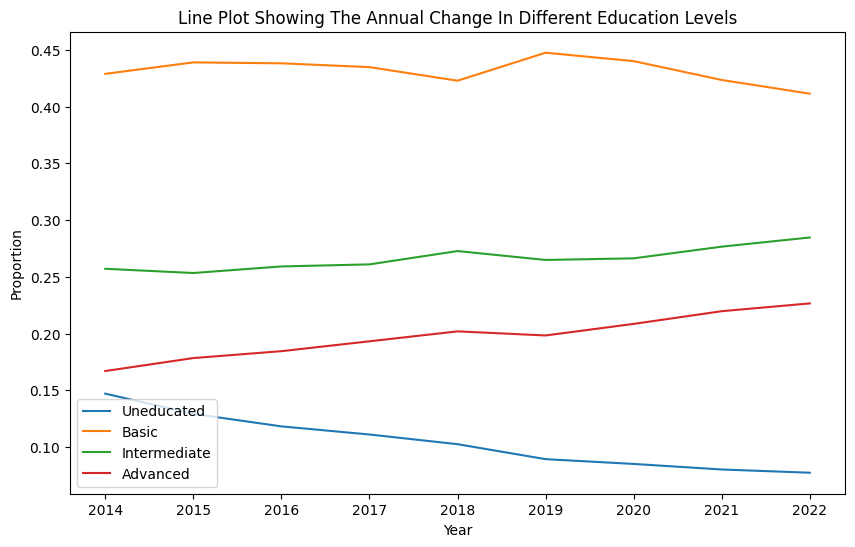

In [17]:

#Four lists will contain each year sum depending on education level
sums_list = [[0 for j in range(9)] for i in range(4)]
for i,j in df_edu.index:
  level = i.split("_")[0]
  if level == "Uneducated":
    sums_list[0][j % 2014] += df_edu.loc[(i,j)].sum()
  elif level == "Basic":
    sums_list[1][j % 2014] += df_edu.loc[(i,j)].sum()
  elif level == "Intermediate":
    sums_list[2][j % 2014] += df_edu.loc[(i,j)].sum()
  else:
    sums_list[3][j % 2014] += df_edu.loc[(i,j)].sum()


# The data is ratioed according to the total number of people in each year
data_array = np.array(sums_list)
proportion_data = data_array / np.sum(data_array, axis = 0, keepdims=True)
proportion_list = proportion_data.tolist()

# The legend names and years are defined
legend_names = ["Uneducated", "Basic", "Intermediate", "Advanced"]
years = list(range(2014,2023))

# Create a single line plot with years as x-axis labels
plt.figure(figsize=(10, 6))

# Plot each line
for i in range(len(proportion_list)):
    plt.plot(years, proportion_list[i], label=legend_names[i])

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("Line Plot Showing The Annual Change In Different Education Levels")

# Add legend
plt.legend()

# Show the plot
plt.show()


**Comment about the graph:** The graph reveals a consistent or declining trend in individuals with uneducated and basic education levels, while indicating a notable increase in those with intermediate and advanced education levels. This suggests a shift towards a more educated workforce, emphasizing the growing significance of higher education in employment. The findings underscore the need for strategic investments in education to align with evolving workforce demands.

### **How has employment for population changed in various sectors over the years?**

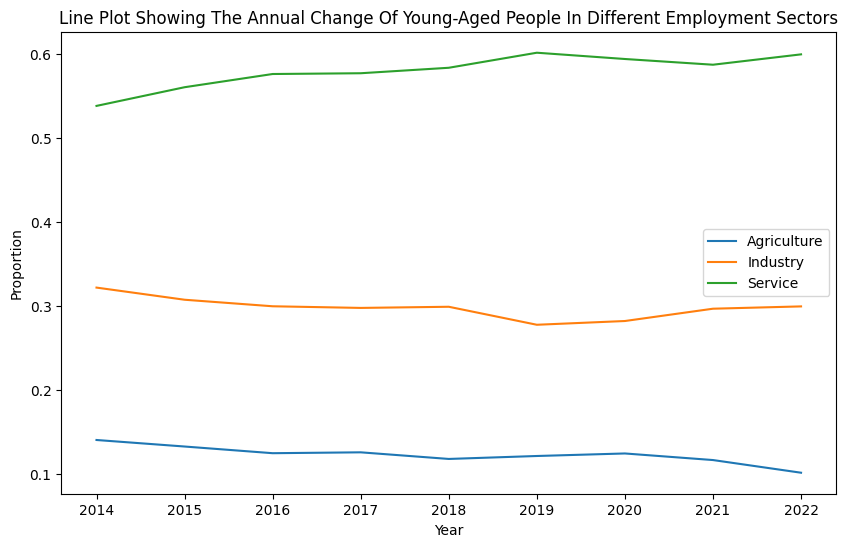

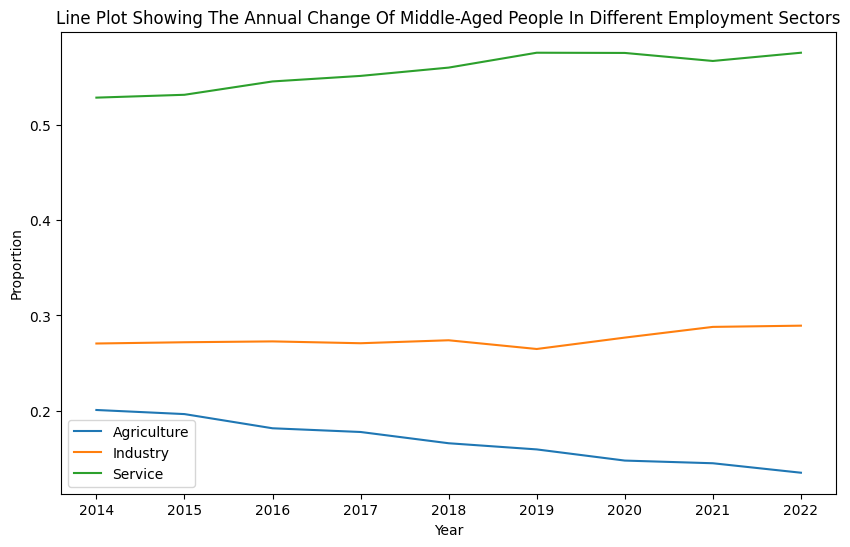

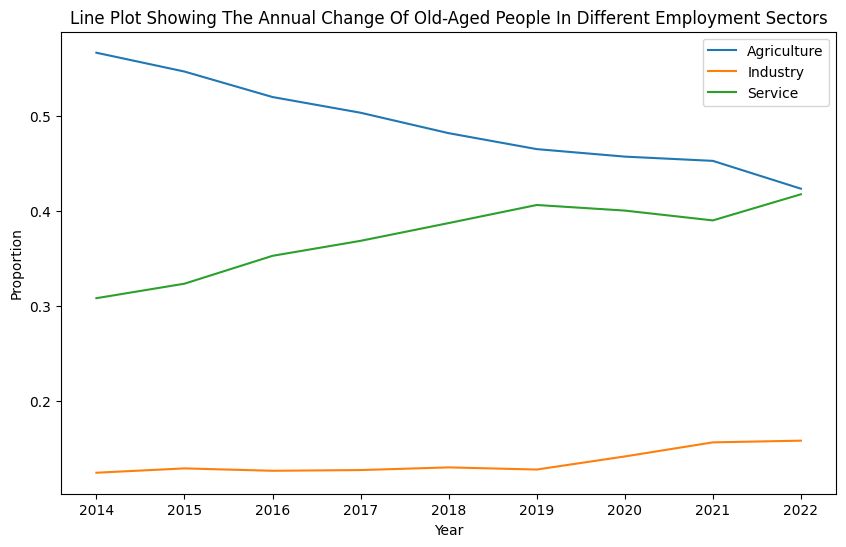

In [18]:
# Plot the age groups for different employment sectors
def plot_age_employment(age_):

    # The sectors are added together for finding the total number of people for each age group in specific sector
    sectors = [[0 for i in range(9)] for j in range(3)]
    for i,j in df_employment.index:
      sector = i.split("_")[0]
      age = i.split("_")[1]
      if age == age_:
        if sector == "Agriculture" :
            sectors[0][j % 2014] += df_employment.loc[(i,j)].sum()
        elif sector == "Industry" :
            sectors[1][j % 2014] += df_employment.loc[(i,j)].sum()
        else:
            sectors[2][j % 2014] += df_employment.loc[(i,j)].sum()


    # The data is ratioed according to the total number of people in each year
    data_array = np.array(sectors)
    proportion_data = data_array / np.sum(sectors, axis = 0, keepdims=True)
    proportion_list = proportion_data.tolist()

    # The legend names and years are defined
    legend_names = ["Agriculture", "Industry", "Service"]
    years = list(range(2014,2023))

    # Create a single line plot with years as x-axis labels
    plt.figure(figsize=(10, 6))

    for i in range(len(proportion_list)):
        plt.plot(years, proportion_list[i], label=legend_names[i])

    # Set labels and title
    plt.xlabel("Year")
    plt.ylabel("Proportion")
    plt.title(f"Line Plot Showing The Annual Change Of {age_}-Aged People In Different Employment Sectors")

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# The age groups are plotted
plot_age_employment("Young")
plot_age_employment("Middle")
plot_age_employment("Old")

**Comment about the graphs:** In the graphs, young and middle-aged populations' distributions are similar. However, in the old-aged graph it can be deduced that the agriculture sector is at their dominance. The old-aged population's contribution to the industry is really less compared to the other generations.

### **What is the distribution of employment ratios in Turkey's regions in the last year (2022)?**

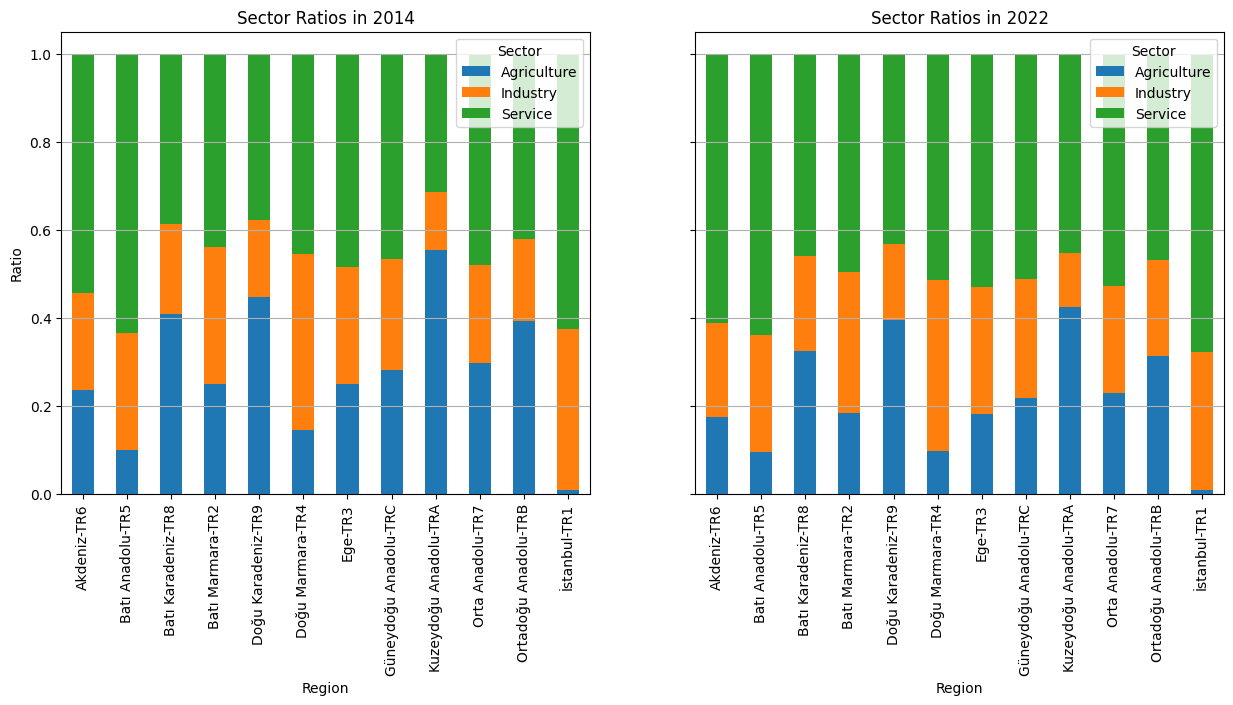

In [19]:

# Assuming df_employment is your original DataFrame

regions = df_employment.columns.to_list()
regions.insert(0, "Sector")
regions.insert(1, "Year")

# Create a new DataFrame df_employment_regions with specified columns
df_employment_regions = pd.DataFrame(columns=regions)
df_employment_regions["Sector"] = ["Agriculture", "Industry", "Service"] * 2
df_employment_regions["Year"] = [2014, 2022] * 3

# Fill NaN values with 0
df_employment_regions.fillna(0, inplace=True)

# Get unique employment headers from df_employment index
employment_headers = df_employment.index.get_level_values("Kategori").unique().to_list()

# Set the index for df_employment_regions
df_employment_regions.set_index(["Sector", "Year"], inplace=True)

# Add the values for each sector
for category in employment_headers:
    if "Agriculture" in category:
        df_employment_regions.loc[("Agriculture", 2014)] += df_employment.loc[(category, 2014)]
        df_employment_regions.loc[("Agriculture", 2022)] += df_employment.loc[(category, 2022)]
    elif "Industry" in category:
        df_employment_regions.loc[("Industry", 2014)] += df_employment.loc[(category, 2014)]
        df_employment_regions.loc[("Industry", 2022)] += df_employment.loc[(category, 2022)]
    elif "Service" in category:
        df_employment_regions.loc[("Service", 2014)] += df_employment.loc[(category, 2014)]
        df_employment_regions.loc[("Service", 2022)] += df_employment.loc[(category, 2022)]

# Create df_regions_total DataFrame
df_regions_total = df_employment_regions.groupby("Year").sum().reset_index()
df_regions_total.set_index("Year", inplace=True)

# Plot the ratios for each year in separate graphs
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

df_employment_regions.sort_index(inplace=True)

# Plot the ratios for each year in separate graphs
for i, year in enumerate([2014, 2022]):
    df_ratio_year = df_employment_regions.xs(year, level="Year") / df_regions_total.loc[year]
    df_ratio_year.transpose().plot(kind="bar", stacked=True, ax=axs[i])
    axs[i].set_title(f"Sector Ratios in {year}")
    axs[i].set_xlabel("Region")
    axs[i].set_ylabel("Ratio")
    axs[i].legend(title="Sector")
    axs[i].yaxis.grid(True)

plt.show()

**Comment about the graph:** This graph shows 3 main sectors ratios in 12 regions of Turkey respectively. It is visable that, the service sector has risen in the last 9 years. However, there is no great difference to notice therefore, the development level of Turkey is not changed notably in the terms of regional sector distrubtion from 2014 to 2022.

### **Are females disadvantaged in agricultural employment in Turkey with basic education level?**

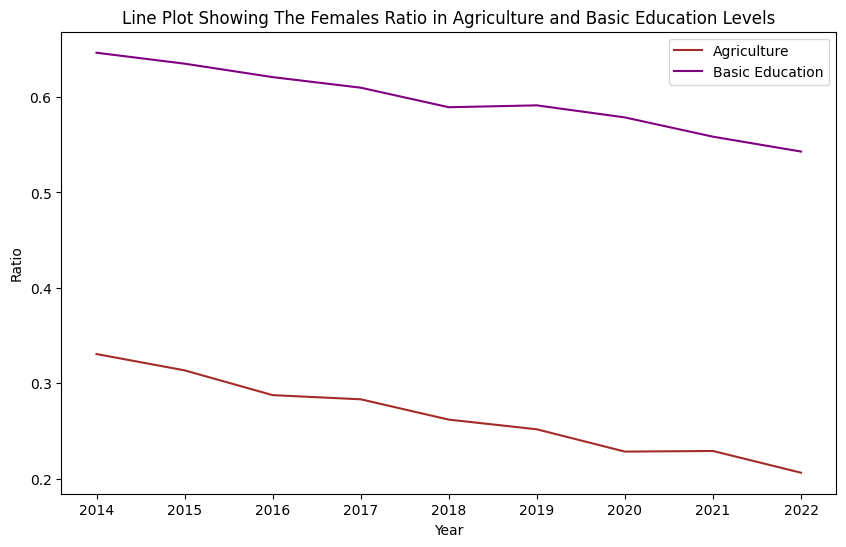

In [20]:
# Fields and education levels are defined
field = ["Agriculture","Service","Industry"]
edu_levels = ["Uneducated","Basic","Intermediate","Advanced"]
# The lists are defined
total_sectors = [0 for i in range(9)]
total_levels = [0 for i in range(9)]

female_basic = [0 for i in range(9)]
female_ac = [0 for i in range(9)]

# The total number of people in sections in each year is found
for f in field:
    temp = (df_employment.loc[f"{f}_Young_Female"].sum(axis=1) + df_employment.loc[f"{f}_Middle_Female"].sum(axis=1) +
                df_employment.loc[f"{f}_Old_Female"].sum(axis=1))
    if f == "Agriculture":
        female_ac += temp
    total_sectors += temp

# The total number of people in education levels in each year is found
    
for l in edu_levels:
    temp = (df_edu.loc[f"{l}_Young_Female"].sum(axis=1) + df_edu.loc[f"{l}_Middle_Female"].sum(axis=1) +
    df_edu.loc[f"{l}_Old_Female"].sum(axis=1))

    if l == "Uneducated" or l == "Basic":
        female_basic += temp
    total_levels += temp


# Create a single line plot with years as x-axis labels
plt.figure(figsize=(10, 6))

plt.plot(years, female_ac / total_sectors,label="Agriculture",color="brown")
plt.plot(years, female_basic / total_levels,label="Basic Education",color="purple")

# Set labels and title
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.title("Line Plot Showing The Females Ratio in Agriculture and Basic Education Levels")

plt.legend()
# Show the plot
plt.show()

**Comment about the graph:** The graph shows that, ratio of women's participation in agricultural sector in Turkey is declining for the last 9 years. This is the result of the participation of women in education is growing year by year and the low education levels' of women are dissapearing by time.

### **What will be the proportion developed sectors over high educated population ratio in 2023? (Linear Regression)**

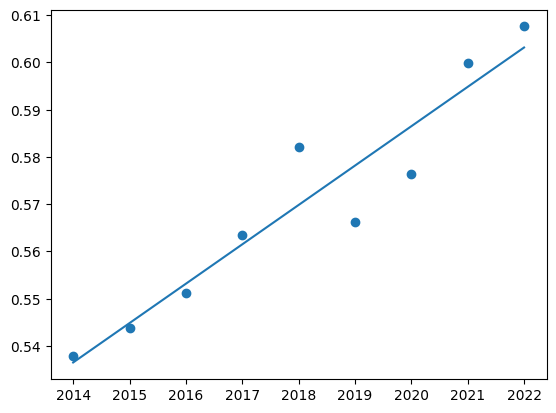

The possible 2023 result: 0.6114717271693273
In year 2070, the ratio will be greater than 1. (1.002932259091228)


In [21]:
# The lists are defined
sectors = [[0 for i in range(9)] for j in range(3)]

# The total number of people in sections in each year is found
for i,j in df_employment.index:
    sector = i.split("_")[0]
    age = i.split("_")[1]

    if sector == "Agriculture" :
        sectors[0][j % 2014] += df_employment.loc[(i,j)].sum()
    elif sector == "Industry" :
        sectors[1][j % 2014] += df_employment.loc[(i,j)].sum()
    else:
        sectors[2][j % 2014] += df_employment.loc[(i,j)].sum()


# The data is ratioed according to the total number of people in each year
data_array = np.array(sectors)
proportion_data = data_array / np.sum(sectors, axis = 0, keepdims=True)
proportion_list = proportion_data.tolist()



# The education lists are defined
high_edu = [[0 for i in range(9)] for j in range(4)]

# The total number of people in education levels in each year is found
for i,j in df_edu.index:
  level = i.split("_")[0]


  if level == "Uneducated" :
    high_edu[0][j % 2014] += df_edu.loc[(i,j)].sum()
  elif level == "Basic" :
    high_edu[1][j % 2014] += df_edu.loc[(i,j)].sum()
  elif level == "Intermediate" :
    high_edu[2][j % 2014] += df_edu.loc[(i,j)].sum()
  else:
    high_edu[3][j % 2014] += df_edu.loc[(i,j)].sum()

# The data is ratioed according to the total number of people in each year
edu_array = np.array(high_edu)
p_data_edu = high_edu /np.sum(high_edu, axis=0, keepdims=True)
p_list_edu = p_data_edu.tolist()

# The intermediate and advanced education levels are added together
p_edu_final = list()
for i in range(9):
    p_edu_final.append(p_list_edu[2][i] + p_list_edu[3][i])

# The service and industry sectors are added together
p_final = list()
for i in range(9):
    p_final.append(proportion_list[1][i] + proportion_list[2][i])

# The ratio of education level to employment is found
y = [b/a for a,b in zip(p_final, p_edu_final)]

# The years are defined
x = [i for i in range(2014,2023)]

# The linear regression is found
slope, intercept,_,_,_ = stats.linregress(x, y)

# The linear regression function is defined
def linregression(x):
  return slope * x + intercept

# The linear regression is applied to the years
mymodel = list(map(linregression, x))

# The linear regression is plotted
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# The linear regression is found for 2023
print("The possible 2023 result: {}".format(linregression(2023)))
# The year of the ratio is greater than 1 is found and printed
a = 2023
while linregression(a) < 1:
  a += 1

else:
  print("In year {}, the ratio will be greater than 1. ({})".format(a, linregression(a)))

**Comment about the graph:** In this section, the combined ratio of industry and service sectors' ratio is divided by the combined ratio of the intermediate and advanced education levels. If the ratio is close to 1, it means that the contury is self-sufficent in terms of education and developed sector employment.

For further analysis, the ML method of "Lineer Regression" is used to guess the 2023 result and the year that the ratio will be converges to 1 is also guessed via same technique.



# Hypothesis Testing

In the hypothesis testing, the question of "What will be the proportion developed sectors over high educated population ratio in 2023?" will be tested. However, the test will go deeper in whether there is a relation between high education (intermediate and advanced) and developed sectors (industry and service) employment ratios. First the null and alternative hypothesis must be defined. The null hypothesis is "There is no relation between the higher education levels of Turkey and general developed sectors" employment. The alternative hypothesis is the opposite of the null hypothesis.

H₀ = There is no relation between the high education levels of Turkey and general developed sectors

H₁ = There is a relation between the high education levels of Turkey and general developed sectors

In [22]:
# The correlation coefficient and p value is found
stats.pearsonr(p_edu_final, p_final)

PearsonRResult(statistic=0.9773544740619886, pvalue=5.628268894524355e-06)

The correlation test was used as statisticial test for proving the H₀ false. The p value was less than .05 and therefore, the null hypothesis was rejected and the alternative hypothesis was accepted. There is a really strong correlation between 2 datasets and is shown by the code snipped above.

# Potential Products

The project, focusing on the correlation between education levels and employment in Turkey across regions, sectors, genders, and years, offers valuable insights for policymakers, businesses, and academia. The findings can guide targeted policies to boost employment in specific sectors or regions, aid businesses in adapting recruitment strategies, and provide a forward-looking perspective through predictive modeling. The outcomes have the potential to shape evidence-based strategies, inform decision-making, and contribute to sustainable economic development in Turkey. The project's impact extends to academia, offering a nuanced understanding of the complex dynamics between education and employment, encouraging further research. Overall, it provides a comprehensive foundation for future interventions and decisions in the realms of education, employment, and economic development.

# Data Engineering Issues

In the realm of data engineering, there are several challenges that require attention, particularly when working with data from the Turkish Statistical Institute (TÜİK) for the project on education levels and employment in Turkey. One significant issue revolves around the organization of TÜİK's data, which has been observed to lack a clear structure, making it challenging to analyze. The presence of missing data and inaccuracies in labeling further complicates the computation process, requiring thorough cleaning and preprocessing. This poses a hurdle in building reliable models and drawing accurate insights. Data engineers must invest considerable effort in handling these issues, employing robust techniques to impute missing values and rectify labeling errors. Additionally, collaboration with TÜİK or relevant authorities to improve data organization and quality is essential for enhancing the overall integrity and usability of the dataset in the project.

# Ethical Issues

Ethical considerations in the project on correlations between regional education levels and employment status in Turkey encompass safeguarding privacy and confidentiality, obtaining informed consent, ensuring data accuracy and transparency, addressing biases to avoid perpetuating inequalities, engaging with affected communities, avoiding harm, securing data, promoting open science, and disclosing potential conflicts of interest. The responsible handling of sensitive information, transparent communication, and community involvement are crucial to maintaining the integrity of the research. By prioritizing ethical principles, the project aims to contribute valuable insights to policymakers, businesses, and academia while mitigating potential risks and ensuring fairness in the analysis and dissemination of findings.

# Conclusion

In summary, the project not only identified correlations between education and employment but also shed light on evolving trends, gender dynamics, and regional variations. The insights gained contribute valuable information for policymakers, businesses, and academia, emphasizing the crucial role of education in shaping the employment landscape in Turkey. The findings advocate for continued efforts to enhance education levels, foster gender inclusivity, and address regional disparities for sustained economic development.